In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# allow plots to appear in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

# Vehicle data
path = './data/vehicles_train.csv'
train = pd.read_csv(path)

<AxesSubplot:xlabel='year'>

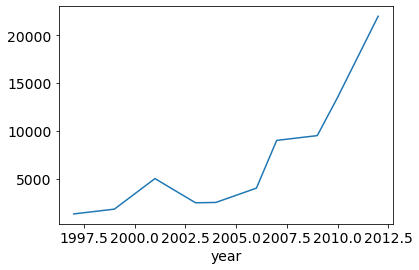

In [11]:
train.groupby('year')['price'].mean().sort_index().plot()

<AxesSubplot:xlabel='miles'>

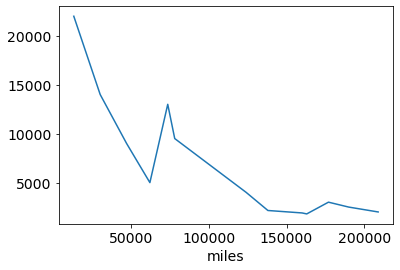

In [14]:
train.groupby('miles')['price'].mean().sort_index().plot()

In [17]:
split_1 = train[train['year']<2007]

In [20]:
split_1.mean()

price      2722.222222
year       2002.222222
miles    151222.222222
doors         3.111111
dtype: float64

In [22]:
split_2 =train[train['year']>2007]

In [23]:
split_2.mean()

price    14625.00
year      2010.25
miles    48625.00
doors        3.00
dtype: float64

<AxesSubplot:xlabel='miles'>

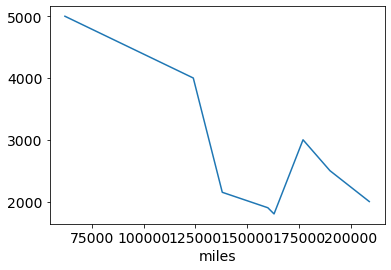

In [24]:
split_1.groupby('miles')['price'].mean().sort_index().plot()

<AxesSubplot:xlabel='miles'>

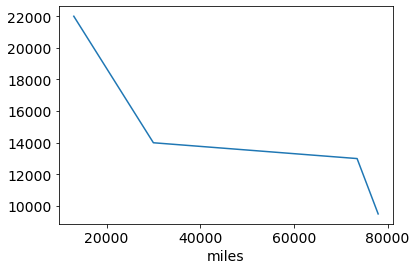

In [25]:
split_2.groupby('miles')['price'].mean().sort_index().plot()

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
train

,price,year,miles,doors,vtype
0,22000,2012,13000,2,car
1,14000,2010,30000,2,car
2,13000,2010,73500,4,car
3,9500,2009,78000,4,car
4,9000,2007,47000,4,car
5,4000,2006,124000,2,car
6,3000,2004,177000,4,car
7,2000,2004,209000,4,truck
8,3000,2003,138000,2,car
9,1900,2003,160000,4,car


In [29]:
train['prediction'] = train.price.mean()

In [30]:
train

,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,car,6571.428571
1,14000,2010,30000,2,car,6571.428571
2,13000,2010,73500,4,car,6571.428571
3,9500,2009,78000,4,car,6571.428571
4,9000,2007,47000,4,car,6571.428571
5,4000,2006,124000,2,car,6571.428571
6,3000,2004,177000,4,car,6571.428571
7,2000,2004,209000,4,truck,6571.428571
8,3000,2003,138000,2,car,6571.428571
9,1900,2003,160000,4,car,6571.428571


In [32]:
from sklearn import metrics
import numpy as np

In [34]:
np.sqrt(metrics.mean_squared_error(train.price, train.prediction))

5936.981985995983

In [46]:
def milage_split(miles):
    lower_milage_price = train[train.miles< miles].price.mean()
    higher_milage_price = train[train.miles > miles].price.mean()
    train['prediction'] = np.where(train.miles < miles, lower_milage_price, higher_milage_price)
    return np.sqrt(metrics.mean_squared_error(train.price, train.prediction))

In [42]:
train[train.miles< 100_000].price.mean()

12083.333333333334

In [51]:
milage_split(105_000)

3530.146530076269

In [53]:
milage_range = list(range(train.miles.min(), train.miles.max(), 1000))

In [55]:
RMSE = [milage_split(miles) for miles in milage_range]

In [57]:
RMSE.plot()

AttributeError: 'list' object has no attribute 'plot'

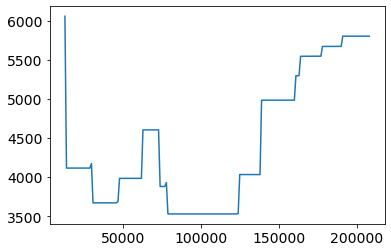

In [59]:
plt.plot(milage_range, RMSE)

In [65]:
def milage_split(feature, feature_size):
    lower_milage_price = train[train[feature]< feature_size].price.mean()
    higher_milage_price = train[train[feature] > feature_size].price.mean()
    train['prediction'] = np.where(train[feature] < feature_size, lower_milage_price, higher_milage_price)
    return np.sqrt(metrics.mean_squared_error(train.price, train.prediction))

In [68]:
year_range = list(range(train.year.min(), train.year.max(), 1))

In [67]:
milage_split('year', 2007)

3005.039583237698

In [70]:
RMSE = [milage_split('year',year) for year in year_range]

In [71]:
RMSE

[5950.813465067365,
 5754.148049904502,
 5769.145575785306,
 5571.830724191791,
 5575.516504999394,
 5582.125927469737,
 5839.752739078207,
 5146.454319576932,
 3717.4019665557266,
 3859.207450093496,
 3005.039583237698,
 3050.2049111494134,
 3183.9565582902296,
 4017.364904912271,
 4115.449316529493]

In [72]:
train['vtype'] = train.vtype.map({'car':0, 'truck':1})

In [74]:
train

,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,0,22000.000000
1,14000,2010,30000,2,0,5384.615385
2,13000,2010,73500,4,0,5384.615385
3,9500,2009,78000,4,0,5384.615385
4,9000,2007,47000,4,0,5384.615385
5,4000,2006,124000,2,0,5384.615385
6,3000,2004,177000,4,0,5384.615385
7,2000,2004,209000,4,1,5384.615385
8,3000,2003,138000,2,0,5384.615385
9,1900,2003,160000,4,0,5384.615385


In [75]:
feature_cols = ['year', 'miles', 'doors', 'vtype']


In [76]:
X = train[feature_cols]
y = train.price

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
treereg = DecisionTreeRegressor(random_state=1)

In [96]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(treereg, X,y, cv=7, scoring='neg_mean_squared_error')

In [97]:
np.mean(np.sqrt(-cross_val_score(treereg, X,y, cv=7, scoring='neg_mean_squared_error')))

2756.78737041021

In [104]:
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)

In [105]:
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')

In [107]:
scores
np.mean(np.sqrt(-scores))

4050.1443001443

In [108]:
max_depth_range = list(range(1,8))

In [109]:
max_depth_range

[1, 2, 3, 4, 5, 6, 7]

In [110]:
RMSE_scores = []

In [111]:
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

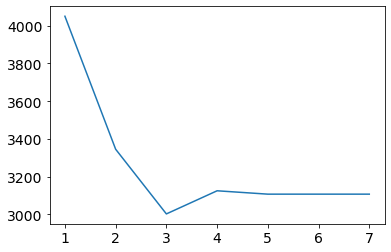

In [113]:
plt.plot(max_depth_range, RMSE_scores)

In [114]:
treereg = DecisionTreeRegressor(max_depth=3, random_state = 1)

In [115]:
treereg.fit(X,y)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [117]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,vtype,0.000000


In [118]:
train

,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,0,22000.000000
1,14000,2010,30000,2,0,5384.615385
2,13000,2010,73500,4,0,5384.615385
3,9500,2009,78000,4,0,5384.615385
4,9000,2007,47000,4,0,5384.615385
5,4000,2006,124000,2,0,5384.615385
6,3000,2004,177000,4,0,5384.615385
7,2000,2004,209000,4,1,5384.615385
8,3000,2003,138000,2,0,5384.615385
9,1900,2003,160000,4,0,5384.615385


In [119]:
# Read the testing data.
path = './data/vehicles_test.csv'

test = pd.read_csv(path)
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [120]:
# Read the testing data.
X_test = test[feature_cols]
y_test = test.price
y_pred = treereg.predict(X_test)

y_pred

array([ 4000.,  5000., 13500.])

In [121]:
# Calculate RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

1190.2380714238084

10 iphones 15 Android phones

What is the non dominant class in this split ? iphone 10 / 25 = 40%

M: 2 iphones 12 androids = 2/12    2
F: 8 iphones 3 androids = 8/3      3  

In [126]:
14/25

0.56

In [127]:
# Read in the data.
path = './data/titanic.csv'
titanic = pd.read_csv(path)

# Encode female as 0 and male as 1.
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})

# Fill in the missing values for age with the median age.
titanic.Age.fillna(titanic.Age.median(), inplace=True)

# Create a DataFrame of dummy variables for Embarked.
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

# Concatenate the original DataFrame and the dummy DataFrame.
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# Print the updated DataFrame.
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1


In [128]:
# Fit a classification tree with max_depth=3 on all data.
from sklearn.tree import DecisionTreeClassifier

treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [138]:
np.random.seed(2)

In [131]:
nums = np.arange(1,21)

In [132]:
nums

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [139]:
np.random.choice(a=nums, size=20, replace=True)

array([ 9, 16, 14,  9, 12, 19, 12,  9,  8,  3, 18, 12, 16,  6,  8,  4,  7,
        5, 11, 12])

In [140]:
np.random.choice(a=nums, size=20, replace=True)

array([20,  8,  7, 11,  2,  4,  6,  5, 15,  7, 20,  3, 17, 15, 13, 19,  5,
       16, 18,  8])

In [141]:
np.random.choice(a=nums, size=20, replace=True)

array([15,  9, 19, 14, 16, 10, 14,  9, 18, 10, 10, 15, 20,  1, 12,  1, 19,
        9, 13, 11])

In [142]:
# Read in and prepare the vehicle training data.
import pandas as pd

path = './data/vehicles_train.csv'
train = pd.read_csv(path)
train['vtype'] = train.vtype.map({'car':0, 'truck':1})
train

,price,year,miles,doors,vtype
0,22000,2012,13000,2,0
1,14000,2010,30000,2,0
2,13000,2010,73500,4,0
3,9500,2009,78000,4,0
4,9000,2007,47000,4,0
5,4000,2006,124000,2,0
6,3000,2004,177000,4,0
7,2000,2004,209000,4,1
8,3000,2003,138000,2,0
9,1900,2003,160000,4,0


In [143]:
# Set a seed for reproducibility.
np.random.seed(123)

In [144]:
samples = [np.random.choice(a=14, size=14, replace=True) for _ in range(1, 11)]
samples

[array([13,  2, 12,  2,  6,  1,  3, 10, 11,  9,  6,  1,  0,  1]),
 array([ 9,  0,  0,  9,  3, 13,  4,  0,  0,  4,  1,  7,  3,  2]),
 array([ 4,  7,  2,  4,  8, 13,  0,  7,  9,  3, 12, 12,  4,  6]),
 array([ 1,  5,  6, 11,  2,  1, 12,  8,  3, 10,  5,  0, 11,  2]),
 array([10, 10,  6, 13,  2,  4, 11, 11, 13, 12,  4,  6, 13,  3]),
 array([10,  0,  6,  4,  7, 11,  6,  7,  1, 11, 10,  5,  7,  9]),
 array([ 2,  4,  8,  1, 12,  2,  1,  1,  3, 12,  5,  9,  0,  8]),
 array([11,  1,  6,  3,  3, 11,  5,  9,  7,  9,  2,  3, 11,  3]),
 array([ 3,  8,  6,  9,  7,  6,  3,  9,  6, 12,  6, 11,  6,  1]),
 array([13, 10,  3,  4,  3,  1, 13,  0,  5,  8, 13,  6, 11,  8])]

In [145]:
samples[0]

array([13,  2, 12,  2,  6,  1,  3, 10, 11,  9,  6,  1,  0,  1])

In [146]:
train

,price,year,miles,doors,vtype
0,22000,2012,13000,2,0
1,14000,2010,30000,2,0
2,13000,2010,73500,4,0
3,9500,2009,78000,4,0
4,9000,2007,47000,4,0
5,4000,2006,124000,2,0
6,3000,2004,177000,4,0
7,2000,2004,209000,4,1
8,3000,2003,138000,2,0
9,1900,2003,160000,4,0


In [147]:
train.iloc[samples[0], :]

,price,year,miles,doors,vtype
13,1300,1997,138000,4,0
2,13000,2010,73500,4,0
12,1800,1999,163000,2,1
2,13000,2010,73500,4,0
6,3000,2004,177000,4,0
1,14000,2010,30000,2,0
3,9500,2009,78000,4,0
10,2500,2003,190000,2,1
11,5000,2001,62000,4,0
9,1900,2003,160000,4,0


In [148]:
# Read in and prepare the vehicle testing data.
path = './data/vehicles_test.csv'
test = pd.read_csv(path)
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [149]:
from sklearn.tree import DecisionTreeRegressor

# Grow each tree deep.
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)

# List for storing predicted price from each tree:
predictions = []

# Define testing data.
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

# Grow one tree for each bootstrap sample and make predictions on testing data.
for sample in samples:
    X_train = train.iloc[sample, 1:]
    y_train = train.iloc[sample, 0]
    treereg.fit(X_train, y_train)
    y_pred = treereg.predict(X_test)
    predictions.append(y_pred)

# Convert predictions from list to NumPy array.
predictions = np.array(predictions)
predictions

array([[ 1300.,  5000., 14000.],
       [ 1300.,  1300., 13000.],
       [ 3000.,  3000., 13000.],
       [ 4000.,  5000., 13000.],
       [ 1300.,  5000., 13000.],
       [ 4000.,  5000., 14000.],
       [ 4000.,  4000., 13000.],
       [ 4000.,  5000., 13000.],
       [ 3000.,  5000.,  9500.],
       [ 4000.,  5000.,  9000.]])

In [150]:
samples[0]

array([13,  2, 12,  2,  6,  1,  3, 10, 11,  9,  6,  1,  0,  1])

In [151]:
samples[1]

array([ 9,  0,  0,  9,  3, 13,  4,  0,  0,  4,  1,  7,  3,  2])

In [152]:
samples[2]

array([ 4,  7,  2,  4,  8, 13,  0,  7,  9,  3, 12, 12,  4,  6])

In [157]:
X_train = train.iloc[samples[0], 1:]
y_train = train.iloc[samples[0], 0]

In [158]:
X_train

,year,miles,doors,vtype
13,1997,138000,4,0
2,2010,73500,4,0
12,1999,163000,2,1
2,2010,73500,4,0
6,2004,177000,4,0
1,2010,30000,2,0
3,2009,78000,4,0
10,2003,190000,2,1
11,2001,62000,4,0
9,2003,160000,4,0


In [162]:
X_train_2 = train.iloc[samples[1], 1:]
y_train_2 = train.iloc[samples[1], 0]

In [161]:
X_train_2

,year,miles,doors,vtype
9,2003,160000,4,0
0,2012,13000,2,0
0,2012,13000,2,0
9,2003,160000,4,0
3,2009,78000,4,0
13,1997,138000,4,0
4,2007,47000,4,0
0,2012,13000,2,0
0,2012,13000,2,0
4,2007,47000,4,0


In [163]:
y_train_2

9      1900
0     22000
0     22000
9      1900
3      9500
13     1300
4      9000
0     22000
0     22000
4      9000
1     14000
7      2000
3      9500
2     13000
Name: price, dtype: int64

In [164]:
treereg.fit(X_train, y_train)
y_pred = treereg.predict(X_test)

In [165]:
y_pred

array([1300.        , 1300.        , 6666.66666667])

In [166]:
treereg.fit(X_train_2, y_train_2)
y_pred = treereg.predict(X_test)

In [167]:
y_pred

array([ 1300.,  1300., 13000.])

In [168]:
# Read in the data.
path ='./data/hitters.csv'
hitters = pd.read_csv(path)

# Remove rows with missing values.
hitters.dropna(inplace=True)

In [169]:
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [170]:
# Encode categorical variables as integers.
hitters['League'] = pd.factorize(hitters.League)[0]
hitters['Division'] = pd.factorize(hitters.Division)[0]
hitters['NewLeague'] = pd.factorize(hitters.NewLeague)[0]
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,475.0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,480.0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,500.0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,91.5,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,750.0,1


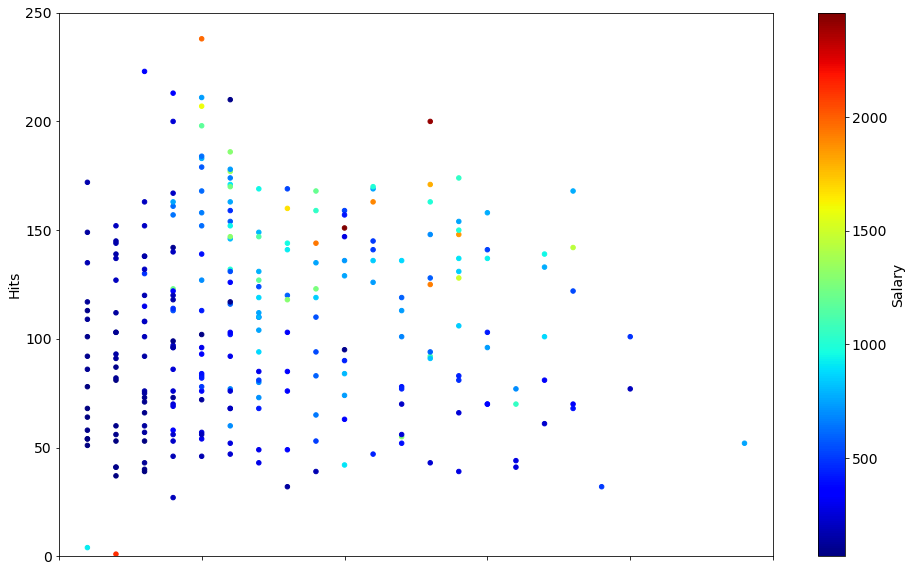

In [172]:
hitters.plot(kind='scatter', x='Years', y='Hits', c='Salary', colormap='jet', xlim=(0, 25), ylim=(0, 250), figsize=(16,10));

In [173]:
# Define features: Exclude career statistics (which start with "C") and the response (salary).
feature_cols = hitters.columns[hitters.columns.str.startswith('C') == False].drop('Salary')
feature_cols

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'NewLeague'],
      dtype='object')

In [174]:
# Define X and y.
X = hitters[feature_cols]
y = hitters.Salary

In [175]:
X

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,League,Division,PutOuts,Assists,Errors,NewLeague
1,315,81,7,24,38,39,14,0,0,632,43,10,0
2,479,130,18,66,72,76,3,1,0,880,82,14,1
3,496,141,20,65,78,37,11,0,1,200,11,3,0
4,321,87,10,39,42,30,2,0,1,805,40,4,0
5,594,169,4,74,51,35,11,1,0,282,421,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,0,1,325,9,3,0
318,492,136,5,76,50,94,12,1,1,313,381,20,1
319,475,126,3,61,43,52,6,1,0,37,113,7,1
320,573,144,9,85,60,78,8,1,1,1314,131,12,1


In [176]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 21))

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_depth.
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

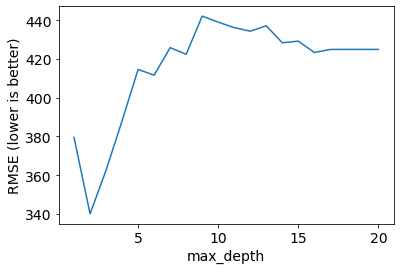

In [177]:
# Plot max_depth (x-axis) versus RMSE (y-axis).
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [178]:
# Show the best RMSE and the corresponding max_depth.
sorted(zip(RMSE_scores, max_depth_range))[0]

(340.034168704752, 2)

In [179]:
# max_depth=2 was best, so fit a tree using that parameter.
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=1)

In [181]:
# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values(by='importance',ascending=False)

,feature,importance
1,Hits,0.511609
6,Years,0.488391
0,AtBat,0.000000
2,HmRun,0.000000
3,Runs,0.000000
4,RBI,0.000000
5,Walks,0.000000
7,League,0.000000
8,Division,0.000000
9,PutOuts,0.000000


In [189]:
scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')

In [190]:
np.mean(np.sqrt(-scores))

340.034168704752

In [185]:
from sklearn.ensemble import RandomForestRegressor

In [186]:
# max_features=5 is best and n_estimators=150 is sufficiently large.
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X, y)

RandomForestRegressor(max_features=5, n_estimators=150, oob_score=True,
                      random_state=1)

In [187]:
# Compute feature importances.
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance')

,feature,importance
12,NewLeague,0.003850
7,League,0.004717
8,Division,0.008865
10,Assists,0.028600
11,Errors,0.037373
2,HmRun,0.040920
9,PutOuts,0.062956
3,Runs,0.079322
0,AtBat,0.093052
4,RBI,0.133242


In [188]:
# Compute the out-of-bag R-squared score.
print((rfreg.oob_score_))

# Find the average RMSE.
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.5151505010254804


295.04270210113174

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 89)

In [192]:
# Fit the model on only the train data
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

RandomForestRegressor(max_features=5, n_estimators=150, oob_score=True,
                      random_state=1)

In [193]:
# Set a threshold for which features to include.
from sklearn.feature_selection import SelectFromModel

print(SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_train).shape)
print(SelectFromModel(rfreg, threshold='median', prefit=True).transform(X_train).shape)

(197, 5)
(197, 7)


In [194]:
X_important =  SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_test)

In [195]:
# Check the RMSE for a random forest that only includes important features.
rfreg = RandomForestRegressor(n_estimators=150, max_features=3, random_state=1)

scores = cross_val_score(rfreg, X_important, y_test, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

314.55879515259073

In [197]:
X_train

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,League,Division,PutOuts,Assists,Errors,NewLeague
82,677,238,31,117,113,53,5,1,1,1377,100,6,1
13,239,60,0,30,11,22,6,1,1,121,151,6,1
190,431,127,8,77,45,58,2,0,1,283,8,3,0
238,473,154,6,61,48,29,6,1,1,846,84,9,1
76,351,97,4,55,29,39,4,0,0,226,7,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,610,186,19,107,98,74,6,0,1,1182,96,13,0
111,325,76,16,33,52,37,5,0,0,726,87,3,1
132,278,70,7,22,37,18,18,1,0,0,0,0,1
26,324,73,4,32,18,22,7,0,1,222,3,3,0


In [196]:
X_important

array([[510, 147,  52,  53,   7],
       [419, 101,  58,  92,  20],
       [475, 126,  43,  52,   6],
       [453, 101,  43,  61,   3],
       [155,  41,  29,  22,  16],
       [627, 177,  81,  70,   6],
       [539, 139,  58,  69,   5],
       [475, 123,  93,  72,   4],
       [283,  77,  47,  26,  16],
       [568, 158,  75,  73,  15],
       [522, 163,  46,  62,  13],
       [522, 140,  77,  60,   4],
       [380, 120,  51,  31,   8],
       [416, 113,  69,  16,   1],
       [424, 110,  47,  36,   7],
       [208,  57,  25,  18,   3],
       [537, 147,  88,  47,  10],
       [581, 145,  68,  21,   2],
       [416, 132,  49,  33,   3],
       [370,  96,  46,  60,  15],
       [479, 133,  72,  55,  17],
       [593, 152,  75,  53,   6],
       [279,  69,  31,  32,   4],
       [633, 210,  56,  59,   6],
       [627, 178,  76,  46,   6],
       [560, 161,  96,  66,   4],
       [323,  81,  32,   8,   2],
       [280,  82,  45,  47,   2],
       [256,  70,  36,  44,  16],
       [547, 1